# PID Autotuning in MATLAB

This section is yet to be written. In the meantime, please review this detailed tutorial from the [Control Systems Tutorial in MATLAB and Simulink](http://ctms.engin.umich.edu/CTMS/index.php?example=Introduction&section=ControlPID).

## MATLAB's PID Block

MATLAB has introduced a PID block that can be used either from the command-line or within Simulink. The benefit of this block is that it can be used to autotune the PID compensator parameters in-loop.

![PID block](pictures/pid-block.png)

The continuous-time PID block is to be found in the **Continuous Systems** library in Simulink. The block diagram is as shown below.

![PID internals](pictures/pid-bd.png)

The transfer function of the PID is

$$D_\mathrm{PID} = P\left(1 + I\frac{1}{s} + D \frac{N}{1 + N\frac{1}{s}}\right)$$

which reduces to

$$D_\mathrm{PID} = P\left(1 + I\frac{1}{s} + D \frac{sN}{s + N}\right)$$

By comparison with the standard PID

$$D_\mathrm{PID}(s) = K_{\rm{prop}}\left(1 + T_Ds + 1/\left( T_I s\right)\right)$$



where $$P = K_\mathrm{prop}$$

$$T_D = ND$$

$$T_I = 1/I$$

There is an extra pole at $s = -N$ which is there to limit the high-frequency gain of the Proportional+Derivative term.

In addition to the pole at the origin which is introduced by the integral term, The MATLAB PID has a proportional gain, two zeros, and an additional pole. Thus there are four parameters which can be adjusted to give a range of possible structures.

## Autotuning the PID

Let us repeat the previous example ([See 4.2 Manual Tuning](../2/tuning)). 

Here we have:

$$G(s) = \frac{1}{5s^2 + 6s + 1}$$

and we ended up with

$$D_{\mathrm{PID}}= K_{\mathrm{prop}} \left(1 + T_D s + \frac{1}{T_s} \right)$$

with $K_{\mathrm{prop}} = 19$, $T_D = 4/19$, $T_I = 2$.

Setting the PID with the equivalent values

In [1]:
P = 19; D = 4/19; I = 2;
D = pidstd(P, I, D)


D =
 
             1      1          
  Kp * (1 + ---- * --- + Td * s)
             Ti     s          

  with Kp = 19, Ti = 2, Td = 0.211
 
Continuous-time PID controller in standard form



In MATLAB we use

In [2]:
s = tf('s');
G = 1/(5*s^2 + 6*s + 1)


G =
 
         1
  ---------------
  5 s^2 + 6 s + 1
 
Continuous-time transfer function.



In [3]:
Go = series(D,G)


Go =
 
  4 s^2 + 19 s + 9.5
  ------------------
  5 s^3 + 6 s^2 + s
 
Continuous-time transfer function.



In [4]:
Gc = feedback(Go,1)


Gc =
 
      4 s^2 + 19 s + 9.5
  ---------------------------
  5 s^3 + 10 s^2 + 20 s + 9.5
 
Continuous-time transfer function.



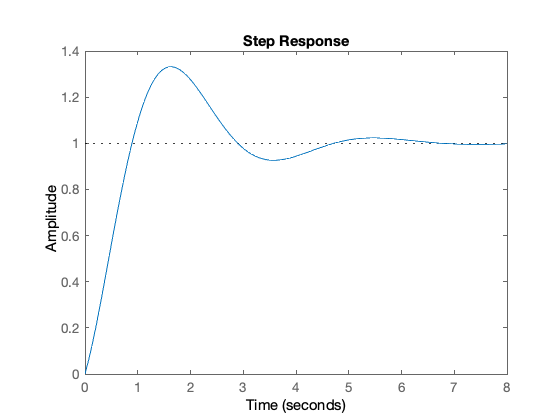

In [5]:
step(Gc)

We can now use this design as a baseline for autotuning the PID

In [6]:
pidTuner(G,D)

Results are:



![Retuned PID](pictures/retuned.png)